# 머신러닝 IV

## 실습 과제
### 데이터셋을 활용한 머신러닝 시스템 적용
1. 데이터 수집
2. 데이터 탐색 및 전처리
3. 모델 선택 및 학습
    - 앙상블
    - 추천
    - 하이퍼파라미터 튜닝
4. 모델 평가 및 시각화

# 소득 분류

### columns 설명
- age: continuous.
- workclass: 사립, 자영업(비자격), 자영업(자격 없음), 연방 정부, 지방 정부, 주 정부, 무급, 일한 적 없음.
- fnlwgt: continuous.
- education: 학사, 대학 졸업, 11학년, 고등학교 졸업, 전문대, 조교 학사, 직업 조교, 9학년, 7-8학년, 12학년, 석사, 1-4학년, 10학년, 박사, 5-6학년, 유치원.
- education-num: continuous.
- marital-status: 기혼-민간인-배우자, 이혼, 미혼, 별거, 과부, 기혼-배우자-부재, 기혼-AF-배우자.
- occupation: 기술 지원, 기술 수리, 기타 서비스, 판매, 임원, 전문가, 핸들러-청소원, 기계 조작 검사, 관리 사무, 농장-어업, 운송-이사, 개인 주택 관리, 보호 근무, 군인. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: 백인, 아시아 태평양 섬 주민, 아메리카 원주민 에스키모, 기타, 흑인.
- sex: 여성, 남성.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: 미국, 캄보디아, 영국, 푸에르토리코, 캐나다, 독일, 미국 외곽(괌-USVI 등), 인도, 일본, 그리스, 남부, 중국, 쿠바, 이란, 온두라스, 필리핀, 이탈리아, 폴란드, 자메이카, 베트남, 멕시코, 포르투갈, 아일랜드, 프랑스, ​​도미니카 공화국, 라오스, 에콰도르, 대만, 아이티, 콜롬비아, 헝가리, 과테말라, 니카라과, 스코틀랜드, 태국, 유고슬라비아, 엘살바도르, 트리나다드 토바고, 페루, 홍콩, 네덜란드.

### 데이터 전처리
1. 결측값 확인
2. 이상치 처리
3. 표준화(SrandardScaler)

In [578]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [579]:
# 데이터 로드
df = pd.read_csv('income_evaluation.csv')

# 모든 문자열 컬럼의 공백 제거
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# '?'를 NaN으로 변환
df.replace('?', np.nan, inplace=True)


In [580]:
print('*'* 30)
print(f"데이터 구조 확인:\n{df.info()}")
print('*'* 30)
print(f"데이터 샘플 확인:\n{df.head()}")
print('*'* 30)
print(f"데이터 기초통계 확인:\n{df.describe()}")
print('*'* 30)
print(f'데이터 결측치 확인:\n{df.isnull().sum()}')

******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
데이터 구조 확인:
None
******************************
데이터 샘플 확인:
   a

In [581]:
# 결측치가 있는 행 모두 삭제
df.dropna(inplace=True)

# 결과 확인
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [582]:
tmp_df = df.copy()

In [583]:
# 대략적인 데이터 살펴보기
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [584]:
tmp_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [585]:
for col in tmp_df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':")
    print(tmp_df[col].value_counts())
    print("\n")  # 고유 값들 사이에 빈 줄을 추가하여 가독성 향상

Unique values in 'workclass':
workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64


Unique values in 'education':
education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64


Unique values in 'marital_status':
marital_status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64


Unique values in 'occupation':
occupation
Prof-spec

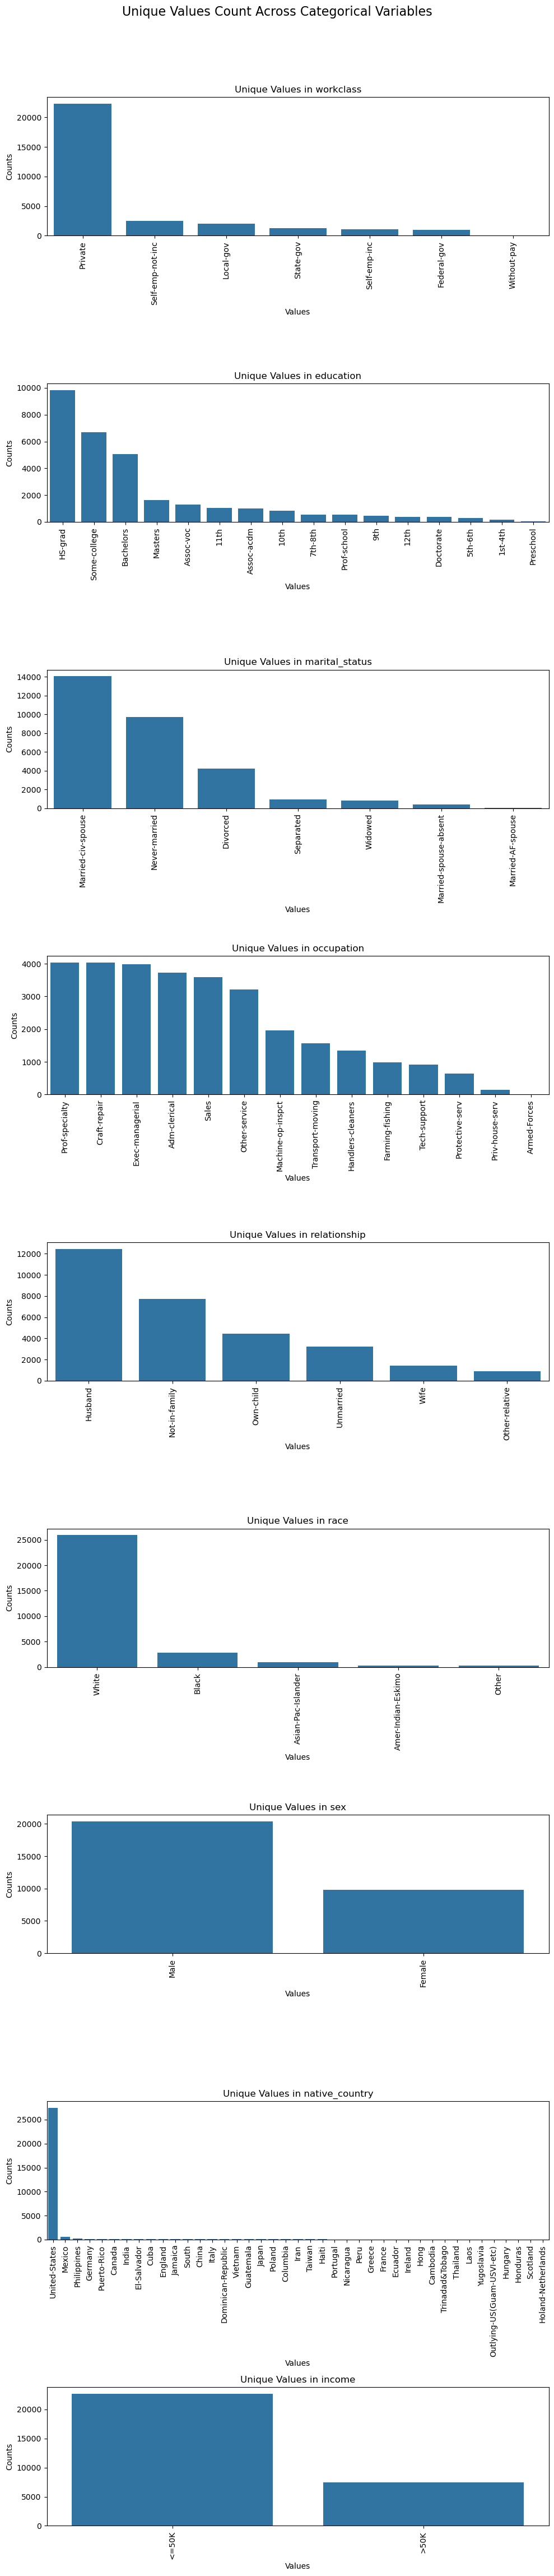

In [586]:
object_columns = tmp_df.select_dtypes(include=['object']).columns

# 플롯 준비
fig, axes = plt.subplots(nrows=len(object_columns), ncols=1, figsize=(10, 5 * len(object_columns)))  # 각 칼럼에 대한 서브플롯 할당

# 각 칼럼별로 서브플롯 생성
for idx, col in enumerate(object_columns):
    # 고유 값 개수 계산
    value_counts = tmp_df[col].value_counts()

    # Seaborn countplot 생성
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx])
    axes[idx].set_title(f'Unique Values in {col}')
    axes[idx].set_xlabel('Values')
    axes[idx].set_ylabel('Counts')
    axes[idx].tick_params(axis='x', rotation=90)  # x 레이블 회전

# 전체 플롯의 제목과 패딩 조정
fig.suptitle('Unique Values Count Across Categorical Variables', y=1.02, fontsize=16)
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [587]:
tmp_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [588]:
tmp_df = tmp_df.drop(['race', 'marital_status','native_country'],axis=1)

tmp_df.head()

,age,workclass,fnlwgt,education,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Female,0,0,40,<=50K


In [589]:
for var in tmp_df.select_dtypes(include='object').columns:
    
     print(tmp_df[var].value_counts()/float(len(tmp_df)))

workclass
Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: count, dtype: float64
education
HS-grad         0.326238
Some-college    0.221404
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
11th            0.034746
Assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
Prof-school     0.017970
9th             0.015085
12th            0.012499
Doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
Preschool       0.001492
Name: count, dtype: float64
occupation
Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-suppo

In [590]:
df = tmp_df.copy()

In [591]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Female,0,0,40,<=50K
5,37,Private,284582,Masters,14,Exec-managerial,Wife,Female,0,0,40,<=50K
6,49,Private,160187,9th,5,Other-service,Not-in-family,Female,0,0,16,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Exec-managerial,Husband,Male,0,0,45,>50K
8,31,Private,45781,Masters,14,Prof-specialty,Not-in-family,Female,14084,0,50,>50K
9,42,Private,159449,Bachelors,13,Exec-managerial,Husband,Male,5178,0,40,>50K


In [592]:
df = df.drop('education',axis=1)
df.head()

,age,workclass,fnlwgt,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,77516,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,Private,215646,9,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,Private,234721,7,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,Private,338409,13,Prof-specialty,Wife,Female,0,0,40,<=50K


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education_num   30162 non-null  int64 
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   sex             30162 non-null  object
 7   capital_gain    30162 non-null  int64 
 8   capital_loss    30162 non-null  int64 
 9   hours_per_week  30162 non-null  int64 
 10  income          30162 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.8+ MB


In [594]:
encoders = {}
for col in df.select_dtypes(include='object').columns:
    # 레이블 인코더 인스턴스 생성
    le = LabelEncoder()
    # 칼럼 데이터에 레이블 인코딩 적용
    df[col] = le.fit_transform(df[col])
    # 인코더 저장 (나중에 역변환에 사용)
    encoders[col] = le
df.head()

,age,workclass,fnlwgt,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,5,77516,13,0,1,1,2174,0,40,0
1,50,4,83311,13,3,0,1,0,0,13,0
2,38,2,215646,9,5,1,1,0,0,40,0
3,53,2,234721,7,5,0,1,0,0,40,0
4,28,2,338409,13,9,5,0,0,0,40,0


In [595]:
df.head()

,age,workclass,fnlwgt,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,5,77516,13,0,1,1,2174,0,40,0
1,50,4,83311,13,3,0,1,0,0,13,0
2,38,2,215646,9,5,1,1,0,0,40,0
3,53,2,234721,7,5,0,1,0,0,40,0
4,28,2,338409,13,9,5,0,0,0,40,0


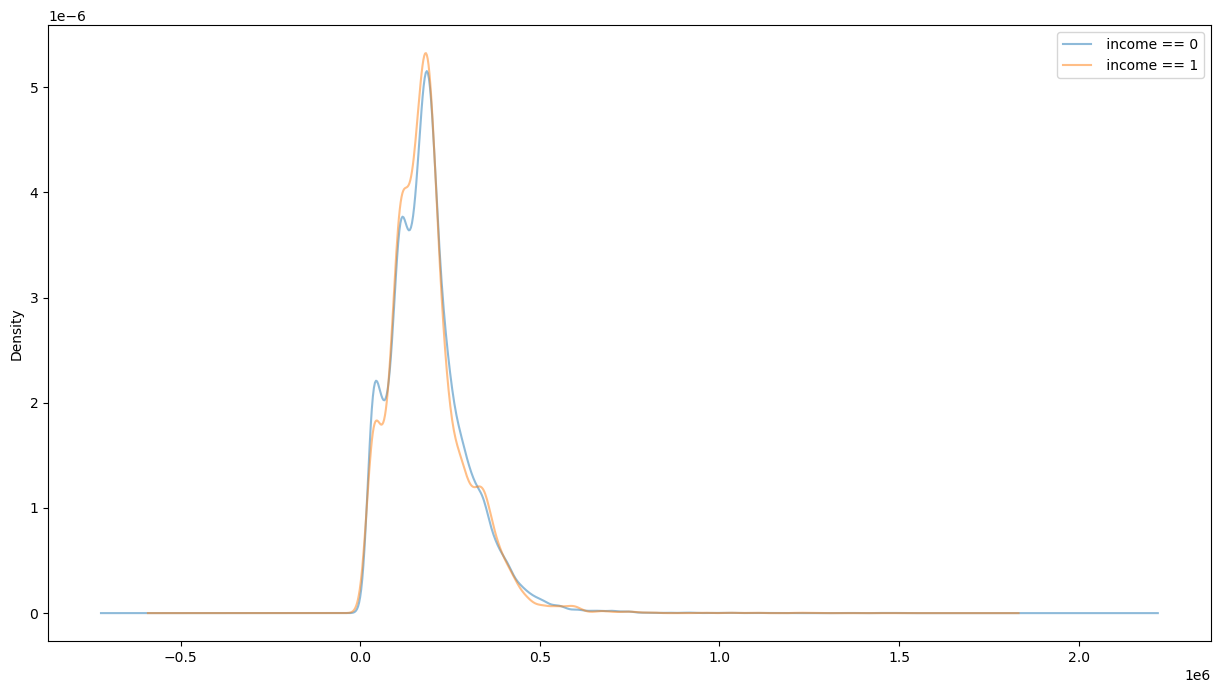

In [596]:
plt.figure(figsize=(15, 8))

df.loc[df['income'] == 0, 'fnlwgt'].plot(kind='kde', alpha=0.5, label=' income == 0')
df.loc[df['income'] == 1, 'fnlwgt'].plot(kind='kde', alpha=0.5, label=' income == 1')

plt.legend()
plt.show()

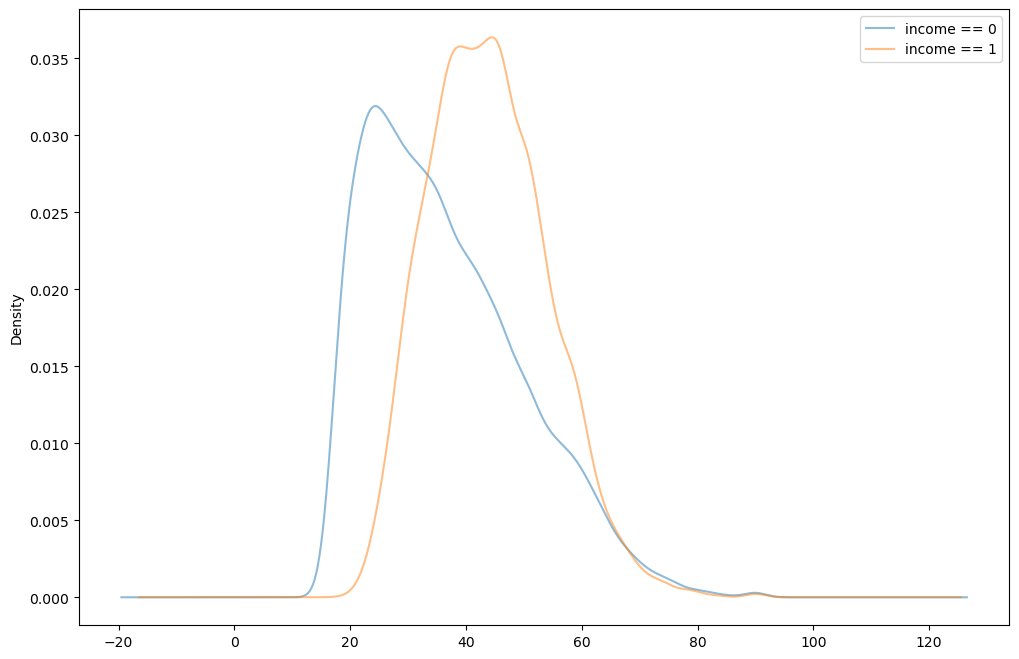

In [597]:
# 소득에 따른 연령 구분
plt.figure(figsize=(12, 8))

df.loc[df['income'] == 0, 'age'].plot(kind='kde', alpha=0.5, label='income == 0')
df.loc[df['income'] == 1, 'age'].plot(kind='kde', alpha=0.5, label='income == 1')

plt.legend()
plt.show()

In [598]:
def make_age_band(df):
    df['age_band'] = 0
    df.loc[df['age'] < 20, 'age_band'] = 10
    df.loc[(df['age'] >= 20) & (df['age'] < 30), 'age_band'] = 20
    df.loc[(df['age'] >= 30) & (df['age'] < 40), 'age_band'] = 30
    df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age_band'] = 40
    df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age_band'] = 50
    df.loc[(df['age'] >= 60) & (df['age'] < 70), 'age_band'] = 60
    df.loc[(df['age'] >= 70) & (df['age'] < 80), 'age_band'] = 70
    df.loc[(df['age'] >= 80) & (df['age'] < 90), 'age_band'] = 80
    df.loc[(df['age'] >= 90), 'age_band'] = 90
    
    return df

df = make_age_band(df)

In [599]:
# 결과 확인
df['age_band'].value_counts().sort_index()

age_band
10    1369
20    7415
30    8211
40    6900
50    4185
60    1634
70     357
80      56
90      35
Name: count, dtype: int64

In [600]:
df.head()

,age,workclass,fnlwgt,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income,age_band
0,39,5,77516,13,0,1,1,2174,0,40,0,30
1,50,4,83311,13,3,0,1,0,0,13,0,50
2,38,2,215646,9,5,1,1,0,0,40,0,30
3,53,2,234721,7,5,0,1,0,0,40,0,50
4,28,2,338409,13,9,5,0,0,0,40,0,20


In [601]:
df = df.drop('age',axis = 1)
df.head()

,workclass,fnlwgt,education_num,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income,age_band
0,5,77516,13,0,1,1,2174,0,40,0,30
1,4,83311,13,3,0,1,0,0,13,0,50
2,2,215646,9,5,1,1,0,0,40,0,30
3,2,234721,7,5,0,1,0,0,40,0,50
4,2,338409,13,9,5,0,0,0,40,0,20


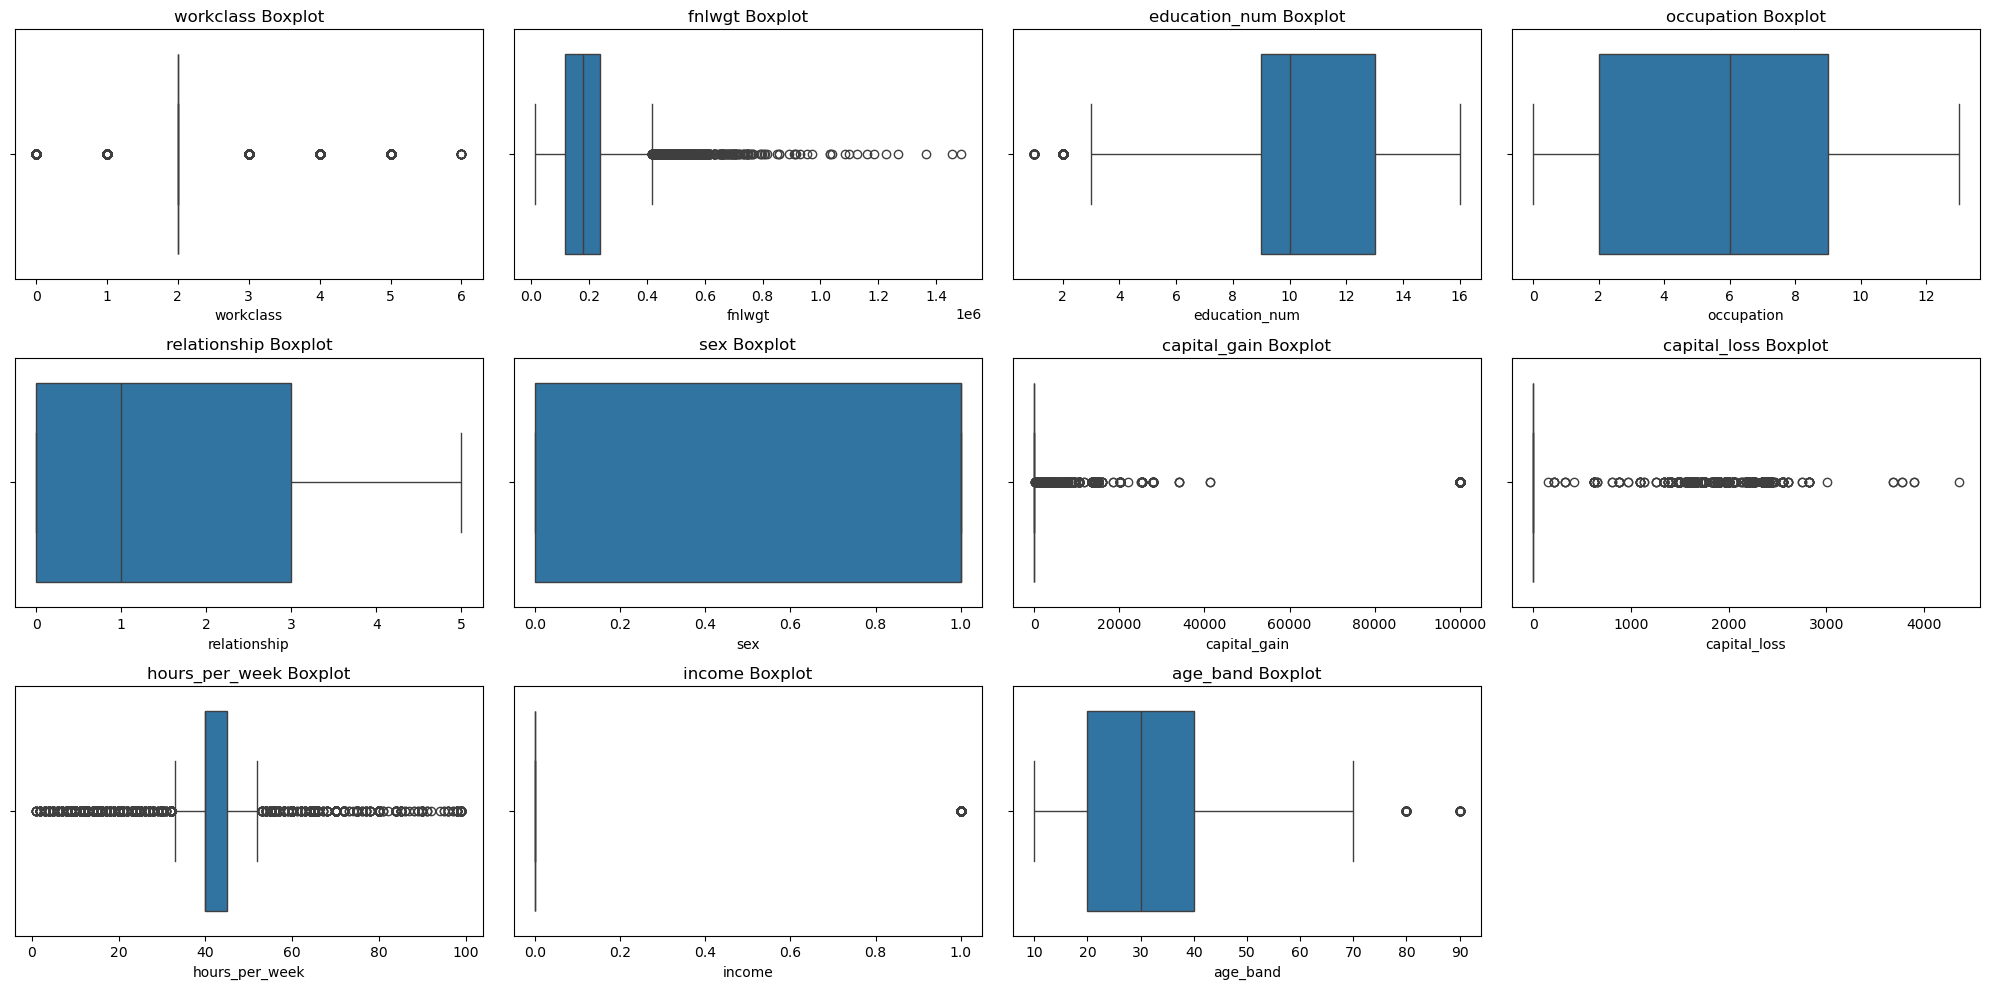

In [602]:
# 각 요소들의 분포 확인
# 박스 플롯 그리는 함수
def drow_boxplots(df):
    columns = df.columns
    num_plots = len(columns)
    
    # 서브 플롯 생성
    fig, axes = plt.subplots(nrows=(num_plots//4)+1, ncols=4, figsize=(20,10))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col} Boxplot')
        
    # 남은 빈 플롯 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
            
    plt.tight_layout()
    plt.show()
    
# 박스플롯 그리기
drow_boxplots(df)

In [603]:
# 이상치 중앙값으로 대체하는 함수
def replace_outliers_with_median(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df
# 이상치 대체
columns_with_outliers = ['fnlwgt','hours_per_week']
df_cleaned = replace_outliers_with_median(df, columns_with_outliers)

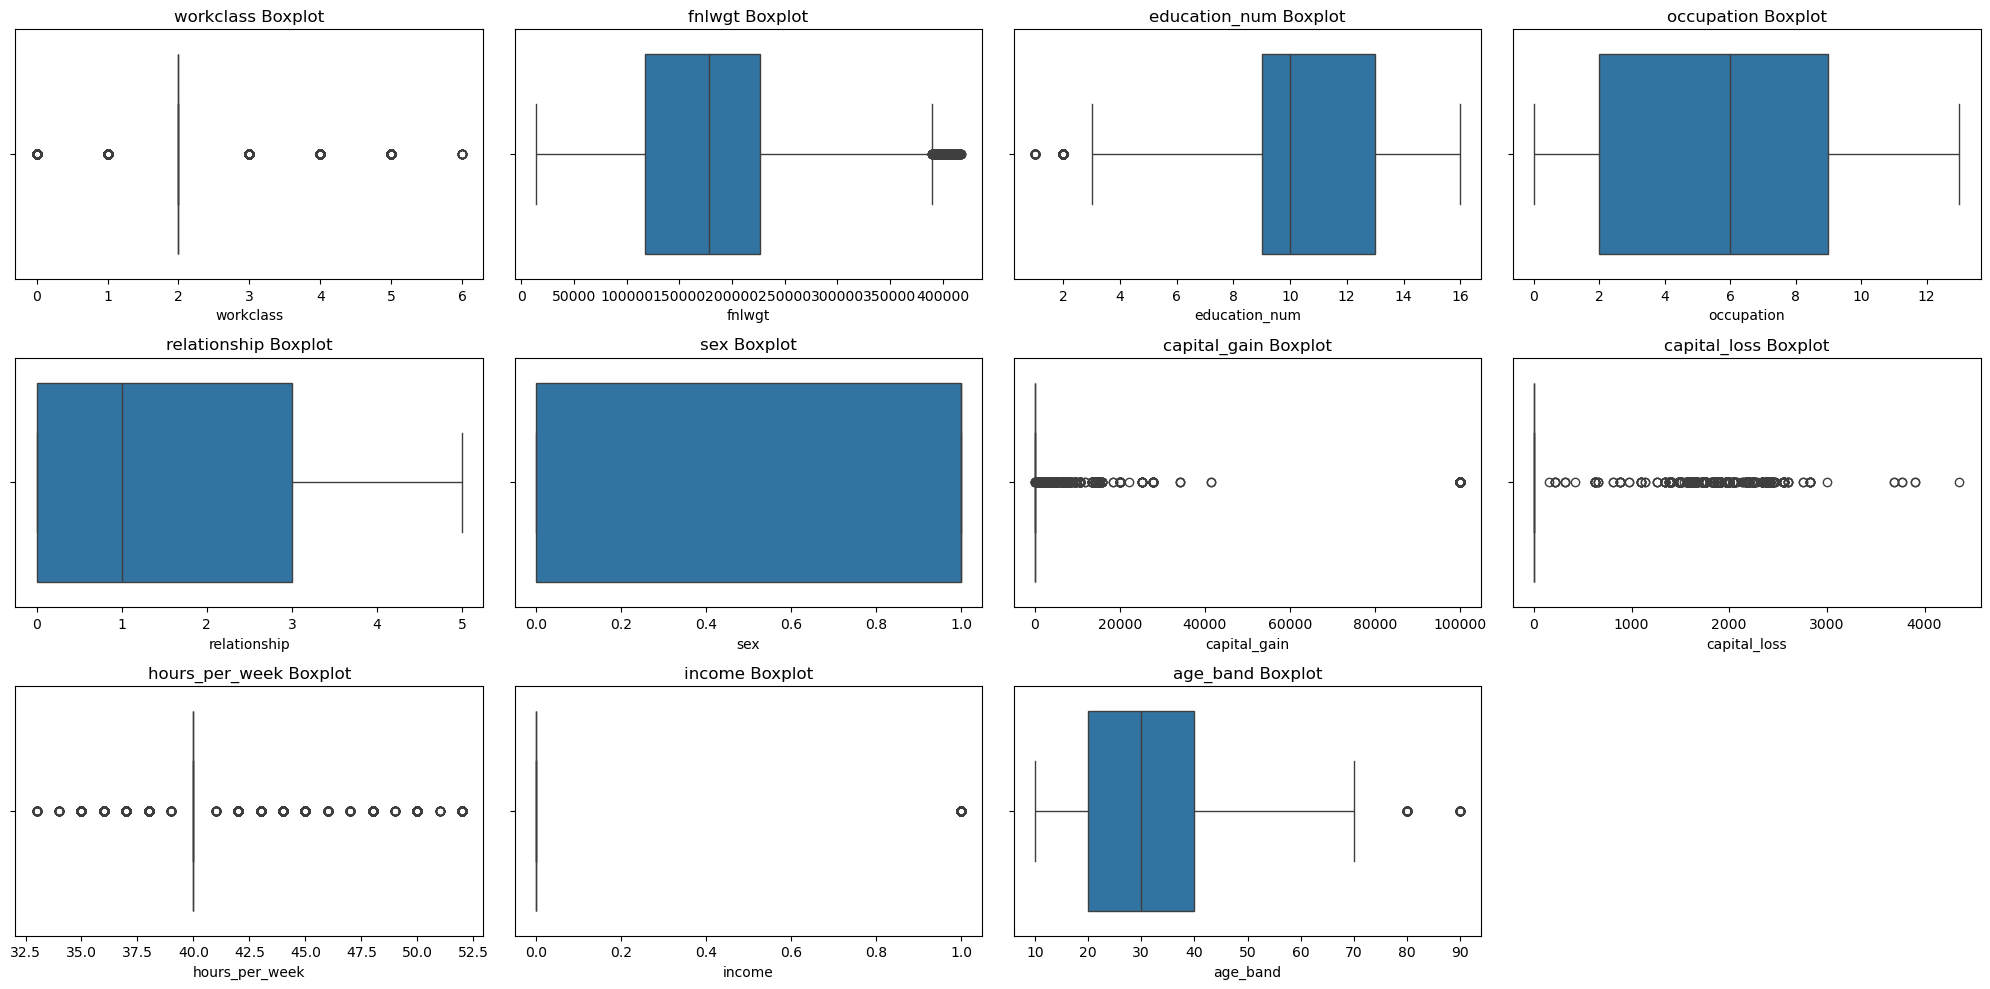

In [604]:
def drow_boxplots(df):
    columns = df.columns
    num_plots = len(columns)
    
    # 서브 플롯 생성
    fig, axes = plt.subplots(nrows=(num_plots//4)+1, ncols=4, figsize=(20,10))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col} Boxplot')
        
    # 남은 빈 플롯 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
            
    plt.tight_layout()
    plt.show()
    
# 박스플롯 그리기
drow_boxplots(df)

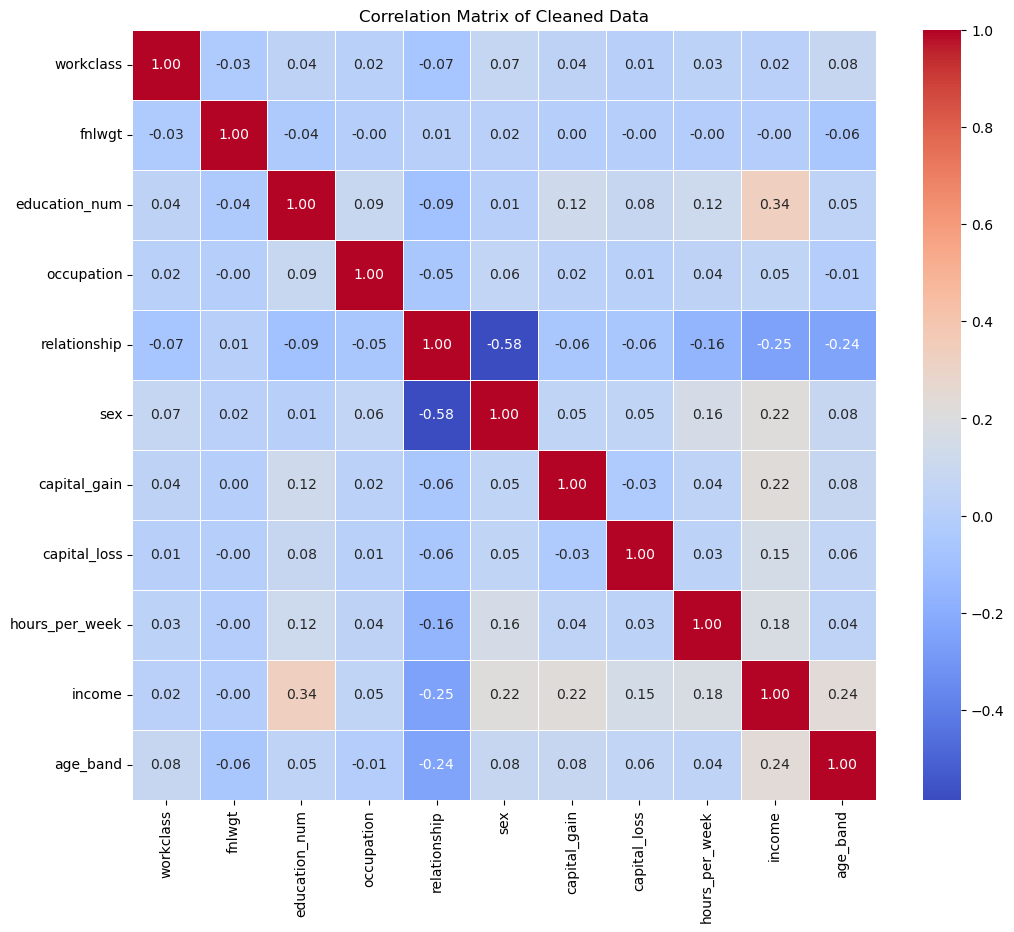

In [605]:
# 상관관계 행렬 계산 및 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Cleaned Data')
plt.show()

In [606]:
# MinMaxScaler 초기화
scaler = MinMaxScaler()

# 수치형 칼럼 선택 (예시)
numeric_columns = ['fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# 정규화 적용
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 정규화 결과 확인
print(df[numeric_columns].head())

     fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0  0.157854       0.800000       0.02174           0.0        0.368421
1  0.172204       0.800000       0.00000           0.0        0.368421
2  0.499898       0.533333       0.00000           0.0        0.368421
3  0.547133       0.400000       0.00000           0.0        0.368421
4  0.803891       0.800000       0.00000           0.0        0.368421


In [607]:
df = df.drop('relationship',axis=1)
df.head()

,workclass,fnlwgt,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,income,age_band
0,5,0.157854,0.800000,0,1,0.02174,0.0,0.368421,0,30
1,4,0.172204,0.800000,3,1,0.00000,0.0,0.368421,0,50
2,2,0.499898,0.533333,5,1,0.00000,0.0,0.368421,0,30
3,2,0.547133,0.400000,5,1,0.00000,0.0,0.368421,0,50
4,2,0.803891,0.800000,9,0,0.00000,0.0,0.368421,0,20


In [608]:
df_c = df.copy()


In [609]:
df = df.drop(['capital_gain','capital_loss'],axis=1)
df.head()

,workclass,fnlwgt,education_num,occupation,sex,hours_per_week,income,age_band
0,5,0.157854,0.800000,0,1,0.368421,0,30
1,4,0.172204,0.800000,3,1,0.368421,0,50
2,2,0.499898,0.533333,5,1,0.368421,0,30
3,2,0.547133,0.400000,5,1,0.368421,0,50
4,2,0.803891,0.800000,9,0,0.368421,0,20


# 1. 앙상블
    - 여러 개의 예측 모델을 결합하여 단일 모델보다 더 나은 성능을 얻는 방법

    - 예측 성능 향상: 여러 모델을 결합하여 예측 정확도 향상
    - 과적합 감소: 다양한 모델의 결과를 결합하여 과적합 방지
    - 안정성 향상: 모델의 변동성을 줄이고, 예측의 일관성 향상

# 1-1 배깅(Bagging)
    - 배깅(Bootstrap Aggregating)은 여러 모델을 병렬적으로 학습하고, 예측을 평균, 다수결 투표를 통해 결정하는 방법

    - 부트스트랩 샘플링
        - 원본 데이터셋에서 중복을 허용하여 여러 개의 샘플을 무작위로 추출
    - 개별 모델 학습
        - 각 부트스트랩 샘플을 사용하여 개별 모델을 학습
    - 예측 결합
        - 모든 모델의 예측을 평균내거나, 다수결 투표를 통해 최종 예측 결정

### 소득 예측

In [610]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [611]:
df.to_csv('../Day12/processed_data.csv', index=False)

In [612]:
# 타겟 변수와 입력 변수 분리
X = df.drop('income', axis=1)  # 'income'을 제외한 모든 변수 사용
y = df['income']  # 타겟 변수

In [617]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(random_state=0)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 수
    'max_depth': [10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드가 되기 위한 최소 샘플 수
}

# 그리드 서치로 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 평가
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.797778882811205
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      4532
           1       0.66      0.40      0.49      1501

    accuracy                           0.80      6033
   macro avg       0.74      0.66      0.68      6033
weighted avg       0.78      0.80      0.78      6033



Fold 1, Train Accuracy: 0.822849511880641, Validation Accuracy: 0.8143389970990468
Fold 2, Train Accuracy: 0.8218364339657396, Validation Accuracy: 0.8126813095731454
Fold 3, Train Accuracy: 0.8237244428071469, Validation Accuracy: 0.8002486531288852
Fold 4, Train Accuracy: 0.8243691287529932, Validation Accuracy: 0.8097803564028181
Fold 5, Train Accuracy: 0.8229876588690367, Validation Accuracy: 0.8052217157065893
Fold 6, Train Accuracy: 0.8237704918032787, Validation Accuracy: 0.8043928719436386
Fold 7, Train Accuracy: 0.822066678946399, Validation Accuracy: 0.821798590965603
Fold 8, Train Accuracy: 0.823632344814883, Validation Accuracy: 0.8155822627434729
Fold 9, Train Accuracy: 0.8238165407994106, Validation Accuracy: 0.8147534189805222
Fold 10, Train Accuracy: 0.8238246534972602, Validation Accuracy: 0.796849087893864


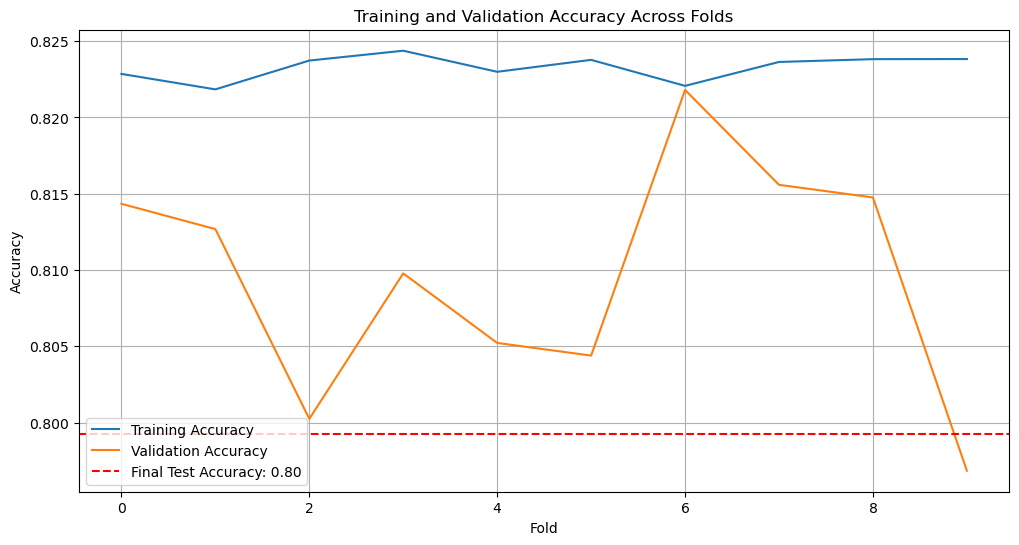

In [623]:
# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10,min_samples_split = 7, min_samples_leaf = 4)

# K-Fold 교차 검증 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_idx = 1
train_accuracies = []
test_accuracies = []

# K-Fold를 사용하여 훈련 데이터 분할
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # 모델 훈련
    rf.fit(X_train_fold, y_train_fold)

    # 훈련 정확도 계산
    train_pred = rf.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # 검증 데이터로 평가
    val_pred = rf.predict(X_val_fold)
    val_accuracy = accuracy_score(y_val_fold, val_pred)
    test_accuracies.append(val_accuracy)
    
    print(f"Fold {fold_idx}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    fold_idx += 1

# 최종 모델로 테스트 데이터 평가
final_pred = rf.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.axhline(y=final_accuracy, color='r', linestyle='--', label=f'Final Test Accuracy: {final_accuracy:.2f}')
plt.title('Training and Validation Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.797778882811205
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4532
           1       0.66      0.40      0.50      1501

    accuracy                           0.80      6033
   macro avg       0.74      0.66      0.69      6033
weighted avg       0.78      0.80      0.78      6033



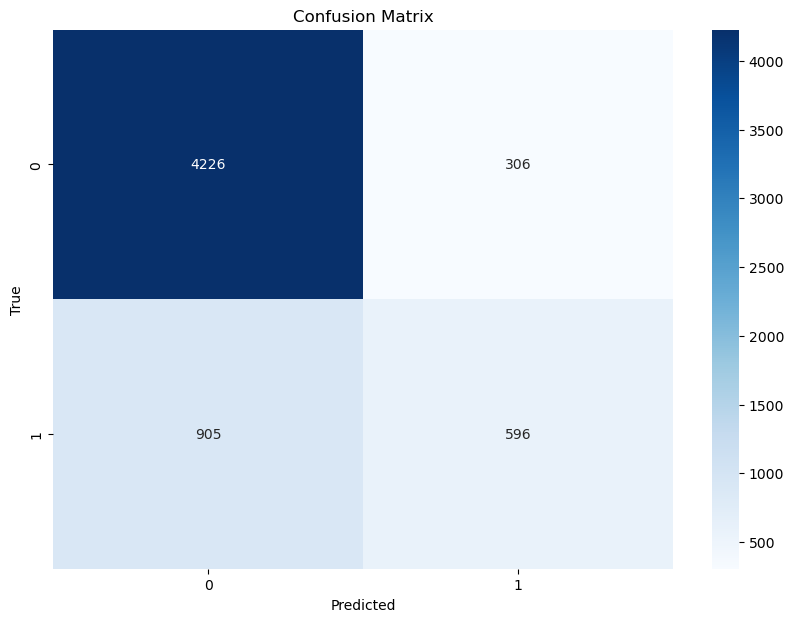

In [625]:
print(f'Accuracy: {accuracy}')

# 분류 리포트 출력
print("Classification Report:")
print(classification_report(y_test, final_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 1-2 부스팅(Boosting)
    - 부스팅은 순차적으로 모델을 학습시키며, 이전 모델이 잘못 예측한 샘플에 더 큰 가중치를 부여하여 오류를 보정하는 방법

    1. 초기 모델 학습
        - 첫 번째 모델을 학습
    2. 오류 샘플 가중치 증가
        - 첫 번째 모델이 잘못 예측한 샘플의 가중치를 증가
    3. 순차적 모델 학습
        - 가중치가 조정된 샘플을 사용하여 다음 모델을 학습
    4. 예측 결합
        - 모든 모델의 예측을 가중 평균하여 최종 예측

In [626]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Accuracy: 0.8123653240510526
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4503
           1       0.70      0.46      0.55      1530

    accuracy                           0.81      6033
   macro avg       0.77      0.70      0.72      6033
weighted avg       0.80      0.81      0.80      6033



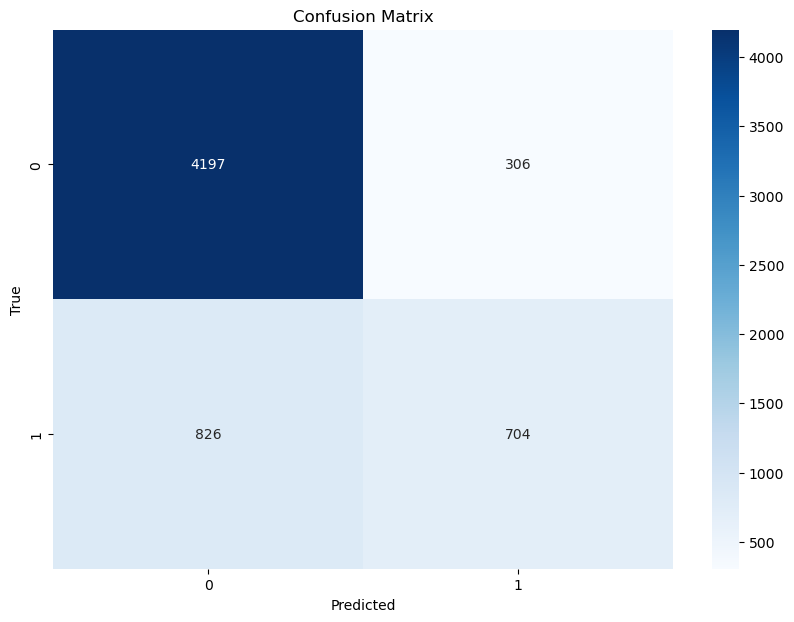

In [627]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 모델 학습
gb.fit(X_train, y_train)

# 예측 수행
y_pred = gb.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 분류 리포트 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Fold 1, Train Accuracy: 0.8201326211088599, Validation Accuracy: 0.8097803564028181
Fold 2, Train Accuracy: 0.8214219930005526, Validation Accuracy: 0.7985909656029838
Fold 3, Train Accuracy: 0.8194879351630134, Validation Accuracy: 0.8043928719436386
Fold 4, Train Accuracy: 0.8209615030392338, Validation Accuracy: 0.8155822627434729
Fold 5, Train Accuracy: 0.8195339841591454, Validation Accuracy: 0.8056361375880646
Fold 6, Train Accuracy: 0.8199484251243323, Validation Accuracy: 0.8130957314546208
Fold 7, Train Accuracy: 0.8199484251243323, Validation Accuracy: 0.807293825113966
Fold 8, Train Accuracy: 0.8218364339657396, Validation Accuracy: 0.7965188561956071
Fold 9, Train Accuracy: 0.8199023761282004, Validation Accuracy: 0.8101947782842934
Fold 10, Train Accuracy: 0.8207855596997744, Validation Accuracy: 0.8030679933665008


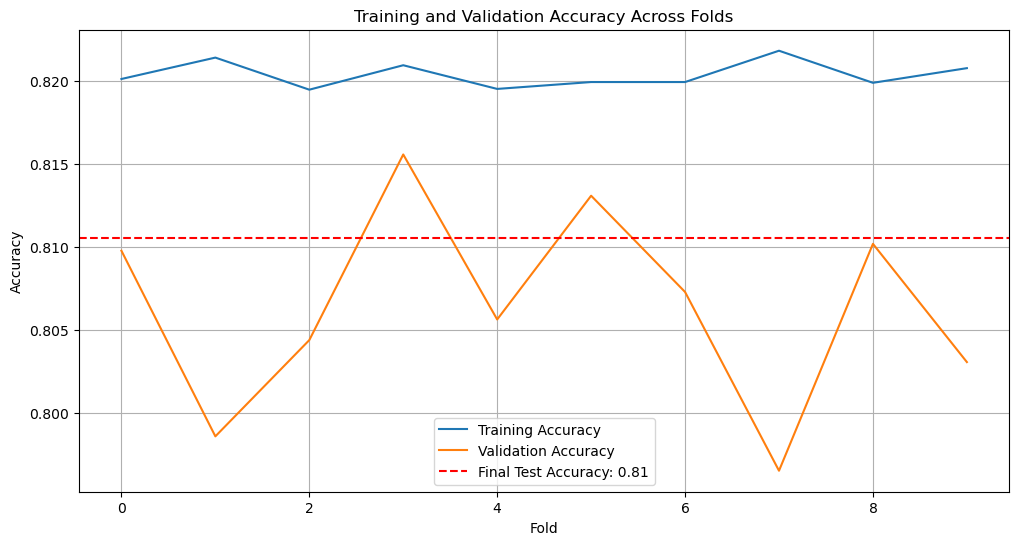

In [628]:
# Gradient Boosting 모델 생성
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# K-Fold 교차 검증 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_idx = 1
train_accuracies = []
test_accuracies = []

# K-Fold를 사용하여 훈련 데이터 분할
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # 모델 훈련
    rf.fit(X_train_fold, y_train_fold)

    # 훈련 정확도 계산
    train_pred = rf.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # 검증 데이터로 평가
    val_pred = rf.predict(X_val_fold)
    val_accuracy = accuracy_score(y_val_fold, val_pred)
    test_accuracies.append(val_accuracy)
    
    print(f"Fold {fold_idx}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    fold_idx += 1

# 최종 모델로 테스트 데이터 평가
final_pred = rf.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.axhline(y=final_accuracy, color='r', linestyle='--', label=f'Final Test Accuracy: {final_accuracy:.2f}')
plt.title('Training and Validation Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 1-3 스태킹(Stacking)
    - 스태킹은 여러 모델의 예측 결과를 입력으로 사용하여 메타 모델을 학습시키는 방법

    1. 기본 모델 학습
        - 여러 개의 기본 모델을 학습
    2. 메타 모델 학습
        - 기본 모델의 예측 결과를 최종 예측으로 사용
    3. 최종 예측
        - 메타 모델의 예측 결과를 최종 예측으로 사용

In [387]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.8402033373853465
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6767
           1       0.72      0.59      0.65      2282

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.77      9049
weighted avg       0.83      0.84      0.83      9049



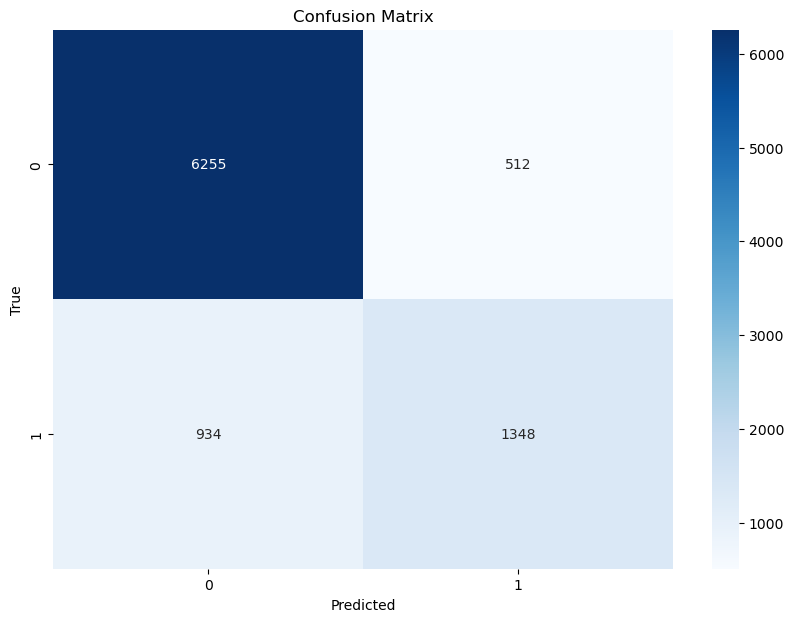

In [388]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 기본 모델 정의
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(kernel='rbf', probability=True, random_state=42))
]

# 스태킹 모델 생성
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# 모델 학습
stacking.fit(X_train, y_train)

# 예측 수행
y_pred = stacking.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 분류 리포트 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Fold 1, Train Accuracy: 0.8201326211088599, Validation Accuracy: 0.8097803564028181
Fold 2, Train Accuracy: 0.8214219930005526, Validation Accuracy: 0.7985909656029838
Fold 3, Train Accuracy: 0.8194879351630134, Validation Accuracy: 0.8043928719436386
Fold 4, Train Accuracy: 0.8209615030392338, Validation Accuracy: 0.8155822627434729
Fold 5, Train Accuracy: 0.8195339841591454, Validation Accuracy: 0.8056361375880646
Fold 6, Train Accuracy: 0.8199484251243323, Validation Accuracy: 0.8130957314546208
Fold 7, Train Accuracy: 0.8199484251243323, Validation Accuracy: 0.807293825113966
Fold 8, Train Accuracy: 0.8218364339657396, Validation Accuracy: 0.7965188561956071
Fold 9, Train Accuracy: 0.8199023761282004, Validation Accuracy: 0.8101947782842934
Fold 10, Train Accuracy: 0.8207855596997744, Validation Accuracy: 0.8030679933665008


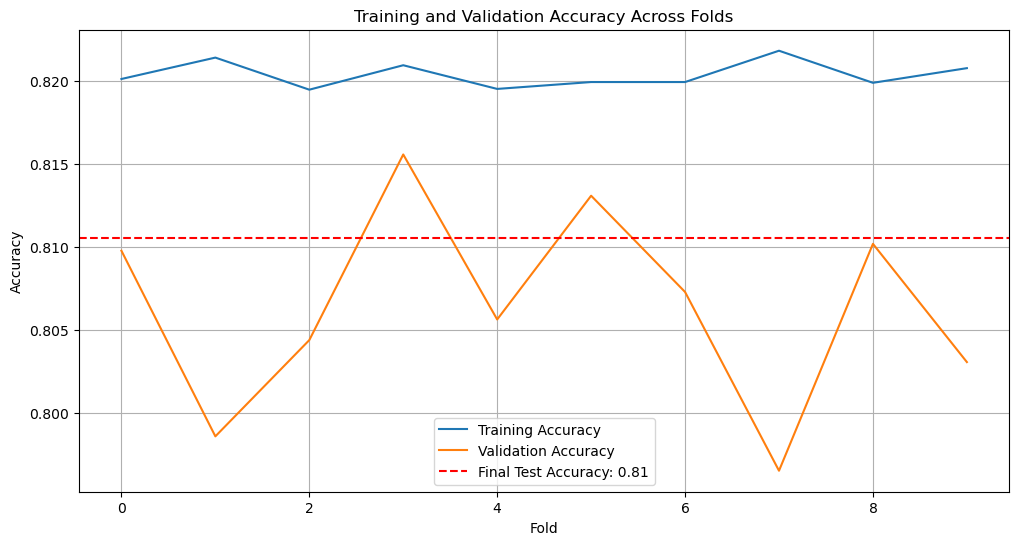

In [629]:
# 기본 모델 정의
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(kernel='rbf', probability=True, random_state=42))
]
# 스태킹 모델 생성
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# K-Fold 교차 검증 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_idx = 1
train_accuracies = []
test_accuracies = []

# K-Fold를 사용하여 훈련 데이터 분할
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # 모델 훈련
    rf.fit(X_train_fold, y_train_fold)

    # 훈련 정확도 계산
    train_pred = rf.predict(X_train_fold)
    train_accuracy = accuracy_score(y_train_fold, train_pred)
    train_accuracies.append(train_accuracy)

    # 검증 데이터로 평가
    val_pred = rf.predict(X_val_fold)
    val_accuracy = accuracy_score(y_val_fold, val_pred)
    test_accuracies.append(val_accuracy)
    
    print(f"Fold {fold_idx}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    fold_idx += 1

# 최종 모델로 테스트 데이터 평가
final_pred = rf.predict(X_test)
final_accuracy = accuracy_score(y_test, final_pred)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.axhline(y=final_accuracy, color='r', linestyle='--', label=f'Final Test Accuracy: {final_accuracy:.2f}')
plt.title('Training and Validation Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [394]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [395]:
df.head()

,workclass,fnlwgt,education,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income,age_band,capital_log
0,5,77516,9,0,1,1,2174,0,40,0,30,7.684784
1,4,83311,9,3,0,1,0,0,13,0,50,0.000000
2,2,215646,11,5,1,1,0,0,40,0,30,0.000000
3,2,234721,1,5,0,1,0,0,40,0,50,0.000000
4,2,338409,9,9,5,0,0,0,40,0,20,0.000000


In [412]:
# 사용자-항목 평점 행렬 생성
# 'user_id', 'item_id', 'rating'라고 가정하며, 실제 열 이름에 맞게 조정해야 합니다.
pivot_table = tmp_df.pivot_table(index='age_band', columns='education', values='income', fill_value=0)

# 코사인 유사도 계산
cosine_sim = cosine_similarity(pivot_table)
cosine_sim_df = pd.DataFrame(cosine_sim, index=pivot_table.index, columns=pivot_table.index)

In [413]:
# 사용자-항목 평점 행렬 생성 확인
print(pivot_table.index)

# 사용자 ID가 1인 사용자의 존재 여부 확인
user_exists = 10 in pivot_table.index
print(f'User 10 exists in the matrix: {user_exists}')

Index([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype='int64', name='age_band')
User 10 exists in the matrix: True


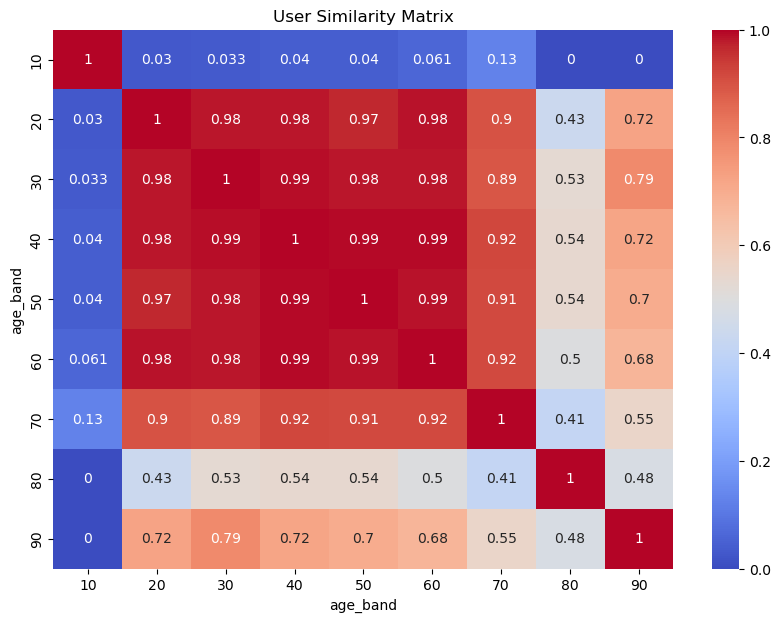

education
3     0.210443
13    0.000000
dtype: float64


In [416]:

# 유사도 매트릭스 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm')
plt.title('User Similarity Matrix')
plt.show()

def recommend_items(user_band, num_recommendations=5):
    if user_band not in cosine_sim_df.index:
        return f'User band {user_band} not found.'

    # 유사도 점수를 통해 상위 사용자들 추출
    sim_scores = cosine_sim_df.loc[user_band]
    top_users = sim_scores.sort_values(ascending=False)[1:num_recommendations+1]
    recommended_items = pd.Series(dtype=float)
    
    # 상위 사용자의 평점을 가중치와 곱하여 추천 점수를 계산
    for other_band, score in top_users.items():  # .iteritems() 대신 .items() 사용
        weighted_scores = pivot_table.loc[other_band] * score
        recommended_items = recommended_items.add(weighted_scores, fill_value=0)
    
    # 이미 평가한 항목은 제외하고 추천
    user_rated_items = pivot_table.loc[user_band]
    recommended_items = recommended_items[user_rated_items == 0]
    return recommended_items.sort_values(ascending=False).head(num_recommendations)

# 사용자 age_band 30에 대한 추천 실행
print(recommend_items(30))

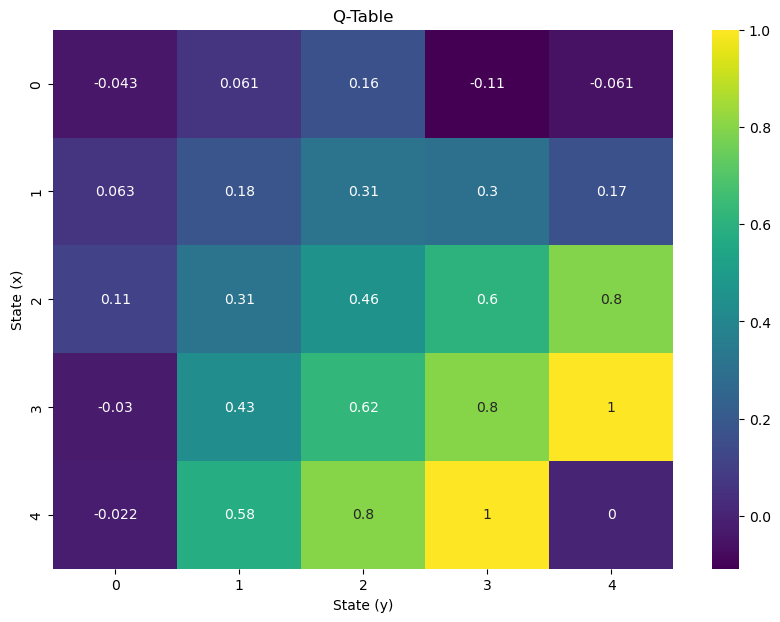

In [417]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그리드월드 환경 정의
class GridWorld:
    def __init__(self, size):
        # 그리드의 크기를 설정합니다.
        self.size = size
        # 초기 상태를 (0, 0)으로 설정합니다.
        self.state = (0, 0)
        # 목표 상태를 그리드의 오른쪽 아래 모서리로 설정합니다.
        self.goal = (size-1, size-1)

    def reset(self):
        # 상태를 초기 상태로 리셋합니다.
        self.state = (0, 0)
        return self.state

    def step(self, action):
        # 현재 상태의 x, y 좌표를 가져옵니다.
        x, y = self.state
        # 행동에 따라 새로운 상태를 결정합니다.
        if action == 0:
            x = max(0, x - 1)  # 위로 이동
        elif action == 1:
            x = min(self.size - 1, x + 1)  # 아래로 이동
        elif action == 2:
            y = max(0, y - 1)  # 왼쪽으로 이동
        elif action == 3:
            y = min(self.size - 1, y + 1)  # 오른쪽으로 이동

        # 새로운 상태를 설정합니다.
        self.state = (x, y)
        # 새로운 상태가 목표 상태인지 확인합니다.
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        # 새로운 상태, 보상, 완료 여부를 반환합니다.
        return self.state, reward, done

# Q-learning 파라미터 설정
size = 5  # 그리드의 크기
env = GridWorld(size)  # 그리드월드 환경 생성
q_table = np.zeros((size, size, 4))  # Q-테이블 초기화 (상태-행동 가치 함수)
alpha = 0.1  # 학습률
gamma = 0.9  # 할인 인자
epsilon = 0.1  # 탐험 확률
episodes = 1000  # 학습 에피소드 수

# Q-learning 알고리즘
for episode in range(episodes):
    state = env.reset()  # 에피소드 시작 시 상태를 초기화
    done = False  # 에피소드가 끝났는지 여부

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(4)  # 탐험: 무작위로 행동 선택
        else:
            action = np.argmax(q_table[state[0], state[1]])  # 활용: Q-값이 최대인 행동 선택

        next_state, reward, done = env.step(action)  # 환경에서 행동 수행
        q_value = q_table[state[0], state[1], action]  # 현재 상태의 Q-값
        best_next_q_value = np.max(q_table[next_state[0], next_state[1]])  # 다음 상태에서의 최대 Q-값

        # Q-테이블 업데이트
        q_table[state[0], state[1], action] = q_value + alpha * (reward + gamma * best_next_q_value - q_value)

        state = next_state  # 상태 업데이트

# Q-테이블 시각화
# Q-learning 알고리즘에서 사용하는 상태-행동 가치 함수(State-Action Value Function)를 저장하는 테이블
# Q-테이블의 각 항목은 특정 상태에서 특정 행동을 취했을 때의 기대 보상을 나타냄
plt.figure(figsize=(10, 7))
sns.heatmap(np.max(q_table, axis=2), annot=True, cmap='viridis')
plt.title('Q-Table')
plt.xlabel('State (y)')
plt.ylabel('State (x)')
plt.show()


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.7470438722510775
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      6767
           1       0.44      0.01      0.02      2282

    accuracy                           0.75      9049
   macro avg       0.59      0.50      0.44      9049
weighted avg       0.67      0.75      0.64      9049



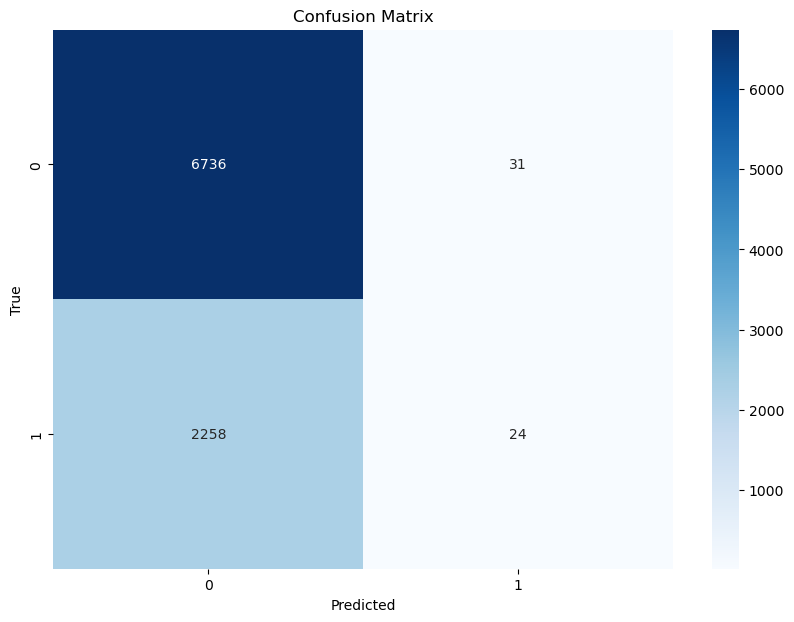

In [422]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 생성
svc = SVC()

# 하이퍼 파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid Search
grid = GridSearchCV(svc, param_grid, refit=True, verbose=0, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

# 최적 하이퍼 파라미터 출력
print(f'Best Parameters: {grid.best_params_}')

# 테스트 데이터로 예측 수행
y_pred = grid.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 분류 리포트 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()